In [20]:
import numpy as np
from shapely.geometry.polygon import LinearRing, Polygon
from shapely.geometry import Point
import random
from shapely import affinity
import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
class Room():        
    def __init__(self, shape):
        self.shape = shape
        self.polygon = Polygon(np.array(shape, dtype=np.float64))

In [22]:
class FurnitureItem(): 
    def __init__(self, unitcost, shape):
        self.shape = shape
        self.unit_cost = unitcost
        self.polygon = Polygon(np.array(shape, dtype=np.float64))
        self.total_cost = np.float64((np.float64(self.unit_cost) * self.polygon.area))

In [23]:
class Problem():
    def __init__(self, room, furniture):
        self.room = room
        self.furniture = furniture

In [24]:
problems = []
with open('problems.rfp') as f:
    for line in f:
        furnitureList = []
        problem = line.replace(" ","").split("#")

        room_shape = problem[0].split(":")[1]
        furniture = problem[1].split(";")

        room = Room([tuple(np.float64(i) for i in el.strip('()').split(',')) for el in room_shape.split('),(')])

        for furnitureItem in furniture:
            parse_furniture = furnitureItem.strip().split(":")
            unit_cost = parse_furniture[0]
            shape = [tuple(np.float64(i) for i in el.strip('()').split(',')) for el in parse_furniture[1].split('),(')]
            furnitureItem = FurnitureItem(unit_cost, shape)
            furnitureList.append(furnitureItem)
        problems.append(Problem(room,furnitureList))

In [25]:
def plot(poly):
    x,y = poly.exterior.xy
    plt.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    plt.show()

In [26]:
len(problems[0].furniture)

94

In [191]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)
    return points

In [252]:
solution = []
room_2 = problems[22].room.polygon
shapes = copy.copy(problems[22].furniture)
initial_area = room_2.area
while ((initial_area-room_2.area)/initial_area) < 0.3:
    for j in shapes:
        points = random_points_within(room_2,1)[0]
        polygon = affinity.translate(j.polygon, points.x, points.y)
        polygon = affinity.rotate(polygon, random.uniform(0,90),origin="centroid")
        if room_2.contains(polygon):
            room_2 = room_2.difference(polygon)
            x,y = polygon.exterior.xy
            solution.append(list(zip(*(x,y))))
            shapes.remove(j)
            print(len(shapes), (initial_area-room_2.area)/initial_area)
room_2.area

499 0.00016406890894130784
498 0.000994667760458945
497 0.0011587366694007005
496 0.001322805578342456
495 0.0014868744872842115
494 0.001650943396225967
493 0.002307219031992989
492 0.002963494667760011
491 0.003619770303527033
490 0.01690935192780923
489 0.017739950779326864
488 0.018396226415093888
487 0.018560295324035643
486 0.019216570959802663
485 0.019585726004921613
484 0.019749794913863368
483 0.019913863822805123
482 0.020283018867924076
481 0.02044708777686583
480 0.021277686628383467
479 0.021441755537325222
478 0.02227235438884286
477 0.022928630024609882
476 0.023297785069728832
475 0.023461853978670587
474 0.023625922887612342
473 0.02477440525020463
472 0.025605004101722267
471 0.026435602953239906
470 0.02659967186218166
469 0.03463904840032768
468 0.035469647251845315
467 0.03583880229696427
466 0.03731542247744007
465 0.03747949138638182
464 0.0382998359310906
463 0.038463904840032356
462 0.0388330598851513
461 0.03899712879409306
460 0.03965340442986008
459 0.03981

156 0.24009433962264098
155 0.24075061525840802
154 0.24140689089417502
153 0.2415709598031168
152 0.24304757998359258
151 0.24353978671041784
150 0.24386792452830136
149 0.2445242001640684
148 0.2451804757998354
147 0.24714930270713648
146 0.2478055783429035
145 0.24846185397867052
144 0.24993847415914633
143 0.2501025430680881
142 0.2502666119770298
141 0.25092288761279685
140 0.2510869565217386
139 0.2525635767022144
138 0.2540401968826902
137 0.25420426579163197
136 0.254860541427399
135 0.2550246103363407
134 0.25568088597210775
133 0.2565114848236254
132 0.25782403609515947
131 0.2579881050041012
130 0.2586443806398682
129 0.25930065627563526
128 0.2596698113207542
127 0.26003896636587315
126 0.2606952420016402
125 0.26151558654634893
124 0.26217186218211597
123 0.26348441345365
122 0.2649610336341258
121 0.2664376538146016
120 0.26709392945036864
119 0.2679245283018863
118 0.26858080393765327
117 0.26894995898277224
116 0.2696062346185393
115 0.270426579163248
114 0.271257178014

4262.062500000005

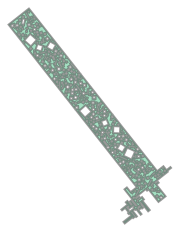

In [253]:
room_2

In [254]:
output = ""
for x in solution:
    output = output + str(x[:-1]).replace('[','').replace(']','') + "; "
print(output)

(7.347118163111411, 33.24681720401607), (6.372810906003437, 33.472040135234735), (6.14758797478477, 32.49773287812676), (7.121895231892747, 32.272509946908094); (-16.65061140518567, 66.92547735730088), (-17.538764321056476, 64.85818821496248), (-15.47147517871808, 63.97003529909169), (-14.583322262847275, 66.03732444143009); (-34.094555946208985, 79.25846910761271), (-34.753287589446586, 78.50609112933485), (-34.00090961116871, 77.84735948609725), (-33.34217796793111, 78.59973746437512); (-104.25336716199286, 157.24437410434697), (-103.25399066077733, 157.27968145228218), (-103.28929800871256, 158.27905795349773), (-104.28867450992809, 158.2437506055625); (-81.94007796807945, 150.2430417452041), (-81.24768061901672, 150.96455814211473), (-81.96919701592736, 151.65695549117746), (-82.66159436499008, 150.9354390942668); (-96.39901212612372, 173.44726258215974), (-97.05078604457762, 172.68884926527818), (-96.29237272769606, 172.0370753468243), (-95.64059880924216, 172.79548866370584); (-1